<a href="https://colab.research.google.com/github/levyofi/Itzkovitch_el_al_AI_assisted_microclimate_modeling/blob/main/Codes/Figures/supplementary_figures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from osgeo import gdal

# Figure S1 - ERA5 vs GLDAS datasets

era5_gldas_comparison.csv file contains comparisons of physical model performances for each meteorological data taken from a specific dataset.

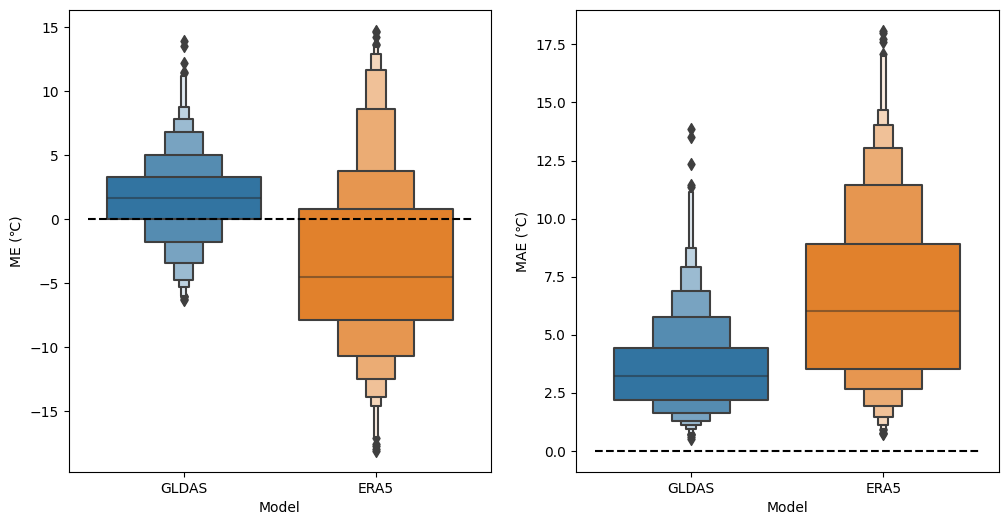

In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/MicroDrone/era5_gldas_comparison.csv')

params = ['ME', 'MAE']

fig, ax = plt.subplots(1,2, figsize = (12,6))
for i, param in enumerate(params):
  df_param = df[[f'Station_{param}', f'ERA5_{param}']]
  sns.boxenplot(data = df_param, ax = ax[i])
  ax[i].set_xlabel('Model')
  ax[i].set_xticks(range(2), ['GLDAS', 'ERA5'])
  ax[i].set_ylabel(param + u' (℃)')
  ax[i].hlines(0, -0.5, 1.5, 'k', '--')
plt.show()

# Figure S2 - Meteorological distribution

In [4]:
train_maps = "Zeelim_29.5.19_0830,Zeelim_29.5.19_1650,Zeelim_29.5.19_1730,Zeelim_30.5.19_0600,Zeelim_30.5.19_0630,Zeelim_18.9.19_0900,Zeelim_18.9.19_1200,Zeelim_18.9.19_1300,Zeelim_18.9.19_1400,Zeelim_18.9.19_1500,Zeelim_18.9.19_1720,Zeelim_7.11.19_1030,Zeelim_7.11.19_1100,Zeelim_7.11.19_1310,Zeelim_7.11.19_1550,Zeelim_7.11.19_1640,Zeelim_30.1.20_0810,Zeelim_30.1.20_0920,Zeelim_30.1.20_0950,Zeelim_30.1.20_1050,Zeelim_30.1.20_1200,Zeelim_30.1.20_1300,Zeelim_30.1.20_1350,Zeelim_30.1.20_1449,Zeelim_30.1.20_1523"
train_set = train_maps.split(',')

In [5]:
dct = {'DataSet': [], 'Value': [], 'Type': []}
for file in glob.glob('/content/gdrive/MyDrive/MicroDrone/met_data/Zeelim*.csv'):
  name = file.split('/')[-1].split('_input')[0]
  ds = 'Train' if name in train_set else 'Test'
  mdf = pd.read_csv(file)

  for param in ['TG', 'TAIR', 'Albedo', 'Cloud_cover', 'Wind', 'P']:
    p1 = mdf[param][0] if param != 'P' else mdf[param][0]/100000
    dct['Value'].append(p1)
    dct['Type'].append(param)
    dct['DataSet'].append(ds)

df = pd.DataFrame(dct)

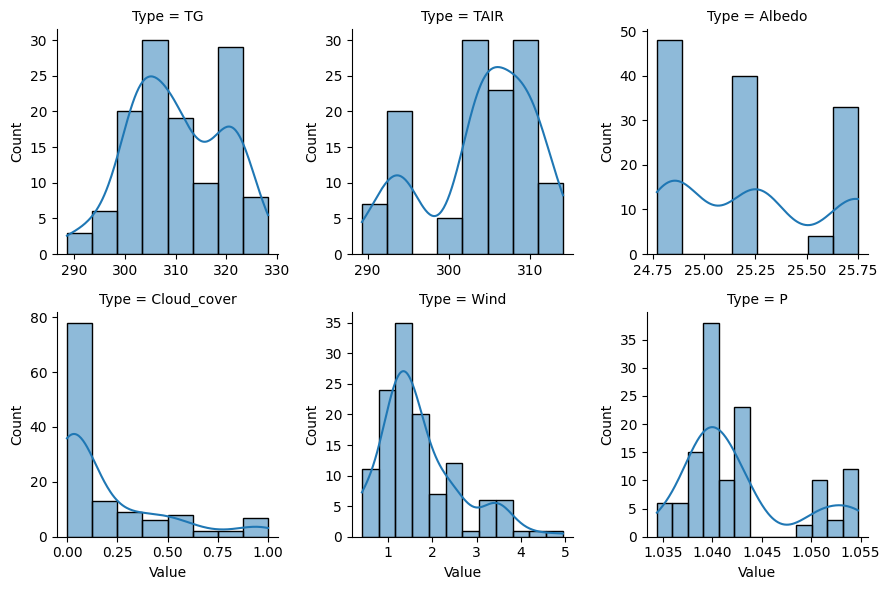

In [6]:
g = sns.FacetGrid(data = df, col = 'Type', #hue = 'DataSet',
                  sharex = False, sharey = False, col_wrap = 3,
                  margin_titles= True)
g.map(sns.histplot, 'Value', kde = True)

# Figure S3 - Inputs Distribution

In [7]:
dct = {'TGI': [], 'Height': [], 'Shade': [], 'RealSolar': [], 'Skyview': [], 'Set': []}

for flight in glob.glob('/content/gdrive/MyDrive/MicroDrone/cropped_maps/*'):
  for i in range(1,6):
    rand = np.random.randint(0,1024**2, 100) # list of random indexes from the map

    dct['TGI'] += list(gdal.Open(f'{flight}/TGI_{i}.tif').ReadAsArray().flatten()[rand])
    dct['Height'] += list(gdal.Open(f'{flight}/height_{i}.tif').ReadAsArray().flatten()[rand])
    dct['Shade'] += list(gdal.Open(f'{flight}/shade_{i}.tif').ReadAsArray().flatten()[rand])
    dct['RealSolar'] += list(gdal.Open(f'{flight}/real_solar_{i}.tif').ReadAsArray().flatten()[rand])
    dct['Skyview'] += list(gdal.Open(f'{flight}/skyview_{i}.tif').ReadAsArray().flatten()[rand])

    name = flight.split('/')[-1]
    ds = 'TrainSet' if name in train_set else 'TestSet'
    dct['Set'] += [ds]*100

df = pd.DataFrame(dct)

In [8]:
mdf = df[df['Height'] < 10].melt(id_vars = ['Set'], value_name = 'Value', var_name = 'Type')

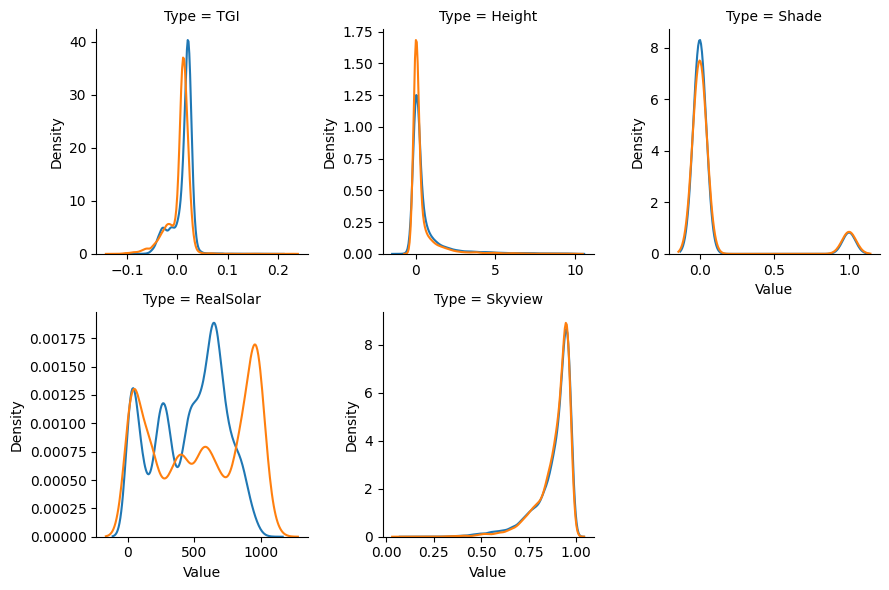

In [9]:
g = sns.FacetGrid(data = mdf, col = 'Type', hue = 'Set',
                  sharex = False, sharey = False, col_wrap = 3,
                  margin_titles= True)
g.map(sns.kdeplot, 'Value')

# Figure S4 - models comparison (MLP, Physical, RF)

comp_df.xlsx file contains mean prediction error for the next models:
* NN - neural network MLP (predict ground temperature from input data)
* Physical
* RF to PE - random forest to prediction errors
* NN to PE - neural network (MLP) to prediction errors

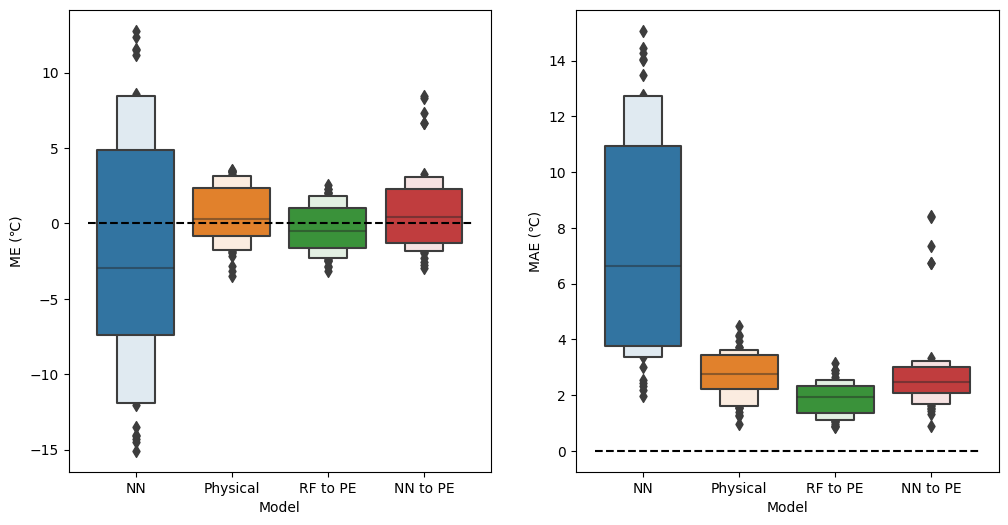

In [10]:
df = pd.read_excel(f'/content/gdrive/MyDrive/MicroDrone/comp_df.xlsx')

params = ['ME', 'MAE']

fig, ax = plt.subplots(1,2, figsize = (12,6))
for i, param in enumerate(params):
  df_param = df[[f'NNM1_{param}', f'Phy_{param}', f'RF_{param}', f'NNM2_{param}']]
  sns.boxenplot(data = df_param, ax = ax[i])
  ax[i].set_xlabel('Model')
  ax[i].set_xticks(range(4), ['NN', 'Physical', 'RF to PE', 'NN to PE'])
  ax[i].set_ylabel(param + u' (℃)')
  ax[i].hlines(0, -0.5, 3.5, 'k', '--')
plt.show()